## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

## Loading Data

In [4]:
print('******Train Data*******')
print(train.shape)
train.head()

******Train Data*******
(10368, 10)


,ID,parents,has_nurs,form,children,housing,finance,social,health,app_status
0,1,usual,less_proper,complete,3,critical,convenient,problematic,not_recom,0
1,2,pretentious,very_crit,completed,1,convenient,inconv,nonprob,not_recom,0
2,3,pretentious,proper,incomplete,1,less_conv,convenient,slightly_prob,priority,1
3,4,great_pret,improper,complete,1,convenient,convenient,nonprob,recommended,1
4,5,great_pret,less_proper,completed,1,convenient,convenient,slightly_prob,priority,1


In [5]:
print('******Test Data*******')
print(test.shape)
test.head()

******Test Data*******
(2592, 9)


,ID,parents,has_nurs,form,children,housing,finance,social,health
0,1,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,2,usual,proper,complete,1,convenient,inconv,nonprob,priority
2,3,usual,proper,complete,1,convenient,inconv,problematic,priority
3,4,usual,proper,complete,1,less_conv,convenient,problematic,recommended
4,5,usual,proper,complete,1,less_conv,convenient,problematic,priority


## Data preprocessing

#### Checking the data types

In [6]:
print('******Train Data*******')
print(train.info())
print()
print('******Test Data*******')
print(test.info())

******Train Data*******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368 entries, 0 to 10367
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10368 non-null  int64 
 1   parents     10368 non-null  object
 2   has_nurs    10368 non-null  object
 3   form        10368 non-null  object
 4   children    10368 non-null  object
 5   housing     10368 non-null  object
 6   finance     10368 non-null  object
 7   social      10368 non-null  object
 8   health      10368 non-null  object
 9   app_status  10368 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 810.1+ KB
None

******Test Data*******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2592 non-null   int64 
 1   parents   2592 non-null   object
 2   has_nurs  2592 non-null   object
 3   form 

#### Change the data type of category variables

In [7]:
cat_cols = ["parents","has_nurs","form","children","housing","finance","social","health"]

for col in cat_cols:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [8]:
print('******Train Data*******')
print(train.info())
print()
print('******Test Data*******')
print(test.info())

******Train Data*******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368 entries, 0 to 10367
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          10368 non-null  int64   
 1   parents     10368 non-null  category
 2   has_nurs    10368 non-null  category
 3   form        10368 non-null  category
 4   children    10368 non-null  category
 5   housing     10368 non-null  category
 6   finance     10368 non-null  category
 7   social      10368 non-null  category
 8   health      10368 non-null  category
 9   app_status  10368 non-null  int64   
dtypes: category(8), int64(2)
memory usage: 244.4 KB
None

******Test Data*******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        2592 non-null   int64   
 1   parents   2592 non-null   category
 2   has_nurs  

#### Checking for missing values

In [9]:
print('******Train Data*******')
print(train.isna().sum())
print()
print('******Test Data*******')
print(test.isna().sum())

******Train Data*******
ID            0
parents       0
has_nurs      0
form          0
children      0
housing       0
finance       0
social        0
health        0
app_status    0
dtype: int64

******Test Data*******
ID          0
parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
dtype: int64


#### Create dummy variables for category data

In [10]:
train_data = pd.get_dummies(train, columns = cat_cols)
test_data = pd.get_dummies(test, columns = cat_cols)

In [11]:
print('******Train Data*******')
print(train_data.shape)
train_data.head()

******Train Data*******
(10368, 29)


,ID,app_status,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1,2,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,3,1,0,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
3,4,1,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,5,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [12]:
print('******Test Data*******')
print(test_data.shape)
test_data.head()

******Test Data*******
(2592, 28)


,ID,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,2,0,0,1,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
2,3,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
3,4,0,0,1,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
4,5,0,0,1,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0


#### Split training data into predictors and response

In [13]:
X = train_data.drop(['app_status','ID'], axis = 1)
y = train_data['app_status']

In [14]:
X.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [15]:
y[:5]

0    0
1    0
2    1
3    1
4    1
Name: app_status, dtype: int64

#### Splitting the dataset into Train and Validation set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 0)

## XGBoost Model

In [17]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)
y_pred = classifier_xg.predict(X_valid)
pred_prob = classifier_xg.predict_proba(X_valid)

[09:43:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
# import evaluation metrices
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

#### Confusion Matrix

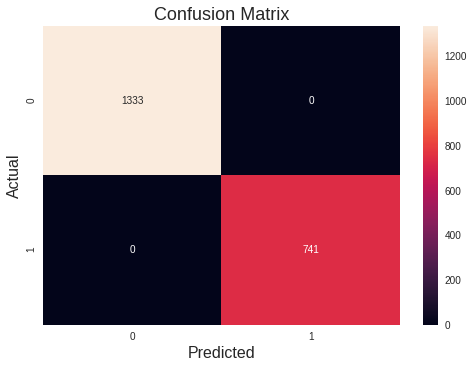

In [20]:
cm_xg = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm_xg, annot = True, annot_kws = {'size' : 10}, fmt = 'd')
plt.title('Confusion Matrix', fontsize = 18)
plt.xlabel('Predicted', fontsize = 16)
plt.ylabel('Actual', fontsize = 16)
plt.savefig('Cf_Matrix',dpi=300)
plt.show()

#### ROC Curve

In [21]:
# roc curve for models
fpr, tpr, thresh = roc_curve(y_valid, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

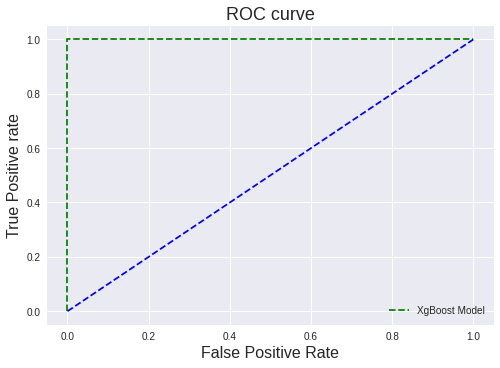

In [22]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label='XgBoost Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive rate', fontsize = 16)

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [23]:
# evaluation metric scores for the model
accuracy_xg = accuracy_score(y_valid, y_pred)
f1_xg = f1_score(y_valid, y_pred)
auc_xg = roc_auc_score(y_valid, pred_prob[:,1])

print("XGBoost Classifier accuracy is : {:.4f}".format(accuracy_xg))
print("XGBoost Classifier F1 score is : {:.4f}".format(f1_xg))
print("XGBoost Classifier AUC score is : {:.4f}".format(auc_xg))

XGBoost Classifier accuracy is : 1.0000
XGBoost Classifier F1 score is : 1.0000
XGBoost Classifier AUC score is : 1.0000


## Predictions to the Test data

In [24]:
test_X = test_data.drop('ID', axis = 1)
test_X.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,0,0,1,0,0,0,1,0,1,0,...,0,1,1,0,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0


In [25]:
test_pred = classifier_xg.predict(test_X)
test_pred

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
pred_xg = pd.DataFrame()
pred_xg['ID'] = test_data['ID']
pred_xg['app_status'] = test_pred
pred_xg

,ID,app_status
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
2587,2588,0
2588,2589,0
2589,2590,0
2590,2591,0


In [27]:
pred_xg.to_csv('Data Geeks.csv', index = False)